<a href="https://www.kaggle.com/code/abriambuggs/rice-classification?scriptVersionId=102933295" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing some libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import matplotlib.image as mpimg
import shutil

In [3]:
# Getting the data
!wget https://www.muratkoklu.com/datasets/vtdhnd09.php

--2022-08-10 01:15:01--  https://www.muratkoklu.com/datasets/vtdhnd09.php
Resolving www.muratkoklu.com (www.muratkoklu.com)... 185.179.25.150
Connecting to www.muratkoklu.com (www.muratkoklu.com)|185.179.25.150|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: Rice_Image_Dataset.zip [following]
--2022-08-10 01:15:02--  https://www.muratkoklu.com/datasets/Rice_Image_Dataset.zip
Reusing existing connection to www.muratkoklu.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 229550800 (219M) [application/zip]
Saving to: ‘vtdhnd09.php’

vtdhnd09.php        100%[===================>] 218.92M  19.9MB/s    in 12s     

2022-08-10 01:15:15 (17.9 MB/s) - ‘vtdhnd09.php’ saved [229550800/229550800]



In [4]:
# Extracting the zipped data
import zipfile
zip_ref = zipfile.ZipFile('./vtdhnd09.php')
zip_ref.extractall()
zip_ref.close()

In [5]:
# Getting the class name
import pathlib

data_dir = pathlib.Path('./Rice_Image_Dataset')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Arborio' 'Basmati' 'Ipsala' 'Jasmine' 'Karacadag'
 'Rice_Citation_Request.txt']


In [6]:
#creating a function to veiw sample images
def view_random_image(target_dir, target_class = None, samples_num=int):
  if target_class == None:
    target_class = class_names[random.randint(0,(len(class_names)-2))]
  else:
    target_class = target_class
  target_folder = str(target_dir) + "/" + str(target_class)
  random_image = random.sample(os.listdir(target_folder), samples_num)
  

  for x in range (0,samples_num):
    img = mpimg.imread(target_folder+"/"+random_image[x])
    plt.figure(figsize=(10,7))
    ax = plt.subplot(1,samples_num, x+1)
    plt.imshow(img)

    ax.title.set_text((target_class,"image shape is: " ,img.shape))

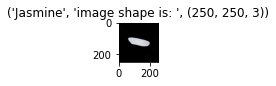

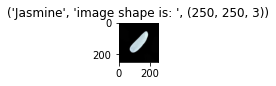

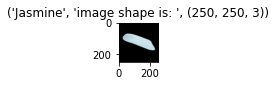

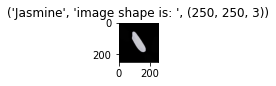

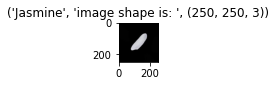

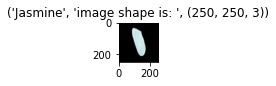

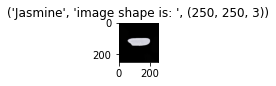

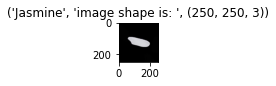

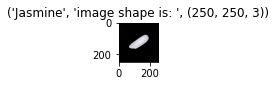

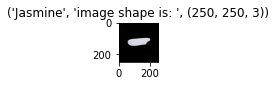

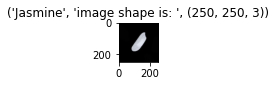

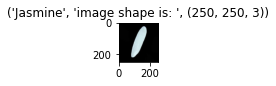

In [7]:
view_random_image(data_dir,samples_num=12)

In [8]:
# Veiwing samples of different types of rice to see the variance
def look_at_rice(target_dir):
  for x in class_names[:-1]:
    target_folder = (target_dir+"/"+x)
    random_image = random.sample(os.listdir(target_folder), 1)
    random_image = str(random_image[0])
    plt.figure(figsize = (10,7))
    img = mpimg.imread(target_folder+"/"+random_image)
    #ax = plt.subplot(1,len(class_names[:-1]),x+1)
    plt.imshow(img)
    plt.xlabel=False
    plt.ylabel = False
    plt.title(x)

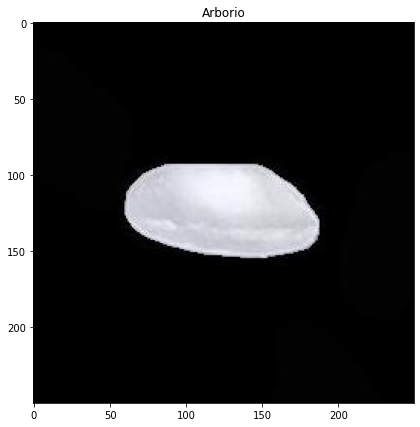

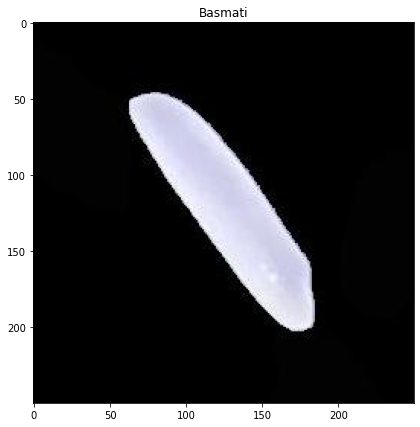

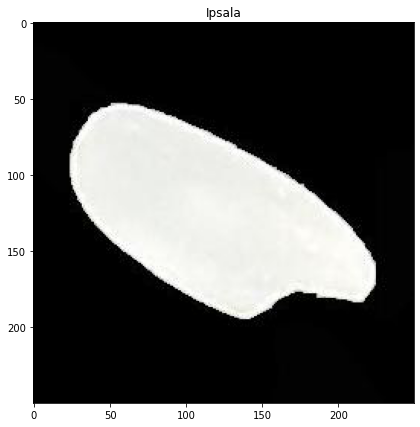

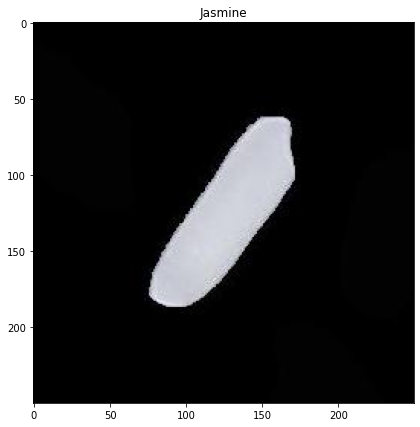

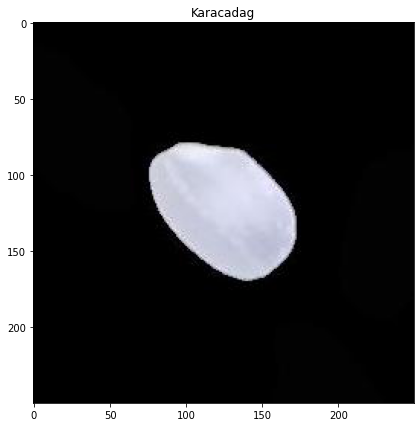

In [9]:
look_at_rice("./Rice_Image_Dataset")

In [10]:
# Making the train and test directories
os.mkdir('./Rice_Image_Dataset/train')
os.mkdir('./Rice_Image_Dataset/test')

In [11]:
# Making the folder for the different classes of rice
for x in class_names[:-1]:
  os.makedirs('./Rice_Image_Dataset/train/'+x)
  os.mkdir('./Rice_Image_Dataset/test/'+x)


In [12]:
# Making the test and training sets
def train_test(target_dir, percentage=float):
  for x in class_names[:-1]:
    pathss = target_dir + x
    img_count = round(len(os.listdir(pathss))*percentage)
    old_file = []
    old_file2 = [] 
    new_file = []
    new_file2 = []
    for stuff in os.listdir(pathss):
      old_file.append(stuff)
      old_file2.append(stuff)
    train_set_file= random.sample(os.listdir(pathss), img_count)
    #print(train_set_file)
    #return(train_set_file)
    
    for file in train_set_file:
      paths_1 = pathss + "/" + file
      paths_2 = target_dir + "train/" + x + "/" + file
      #print(paths_1,paths_2)
      shutil.copyfile(paths_1, paths_2)
    for thing in old_file:
      if thing in train_set_file:
        old_file2.remove(thing)
        new_file.append(thing)
      else:
        new_file2.append(thing)
    #return(old_file, new_file, train_set_file, new_file2, old_file2)
    for thing2 in old_file2:
      paths_3 = pathss + "/" + thing2
      paths_4 = target_dir + "test/" + x +"/" + thing2
      shutil.copyfile(paths_3, paths_4)

In [13]:
work_dir = './Rice_Image_Dataset/'
train_test(work_dir, .8)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_dir = "./Rice_Image_Dataset/train"
test_dir = "./Rice_Image_Dataset/test"

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,244),
                                               batch_size = 32,
                                               class_mode = "categorical")
print("Testing images:")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224))


Training images:
Found 60000 images belonging to 5 classes.
Testing images:
Found 15000 images belonging to 5 classes.


In [15]:
# Using the efficientnet/b0/feature-vector model
efficientnet_url = 'https://tfhub.dev/google/efficientnet/b0/feature-vector/1'

In [16]:
from tensorflow.keras import layers
import tensorflow_hub as hub

In [17]:
# Create_model function to create a model from a url
def create_model(model_url, num_class = 5):
  feature_extractor_layer = hub.KerasLayer(handle = model_url,
                                           #trainable = True,
                                           name = "feature_extraction_layer",
                                           input_shape = (224,224,3))
  model = tf.keras.Sequential([
                                feature_extractor_layer,
                                layers.Dense(num_class, activation = "softmax", name="output_layer")
  ])
  return model

In [18]:
efficient_model = create_model(efficientnet_url, 5)

2022-08-10 01:16:09.046739: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-10 01:16:10.252959: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [19]:
efficient_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["accuracy"])

In [20]:
history_efficient = efficient_model.fit(train_data,
                                  batch_size =32,
                                  epochs = 8,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data))

Epoch 1/8
1875/1875 [==============================] - 1627s 865ms/step - loss: 0.0879 - accuracy: 0.9812 - val_loss: 0.0360 - val_accuracy: 0.9899
Epoch 2/8
1875/1875 [==============================] - 1610s 859ms/step - loss: 0.0251 - accuracy: 0.9933 - val_loss: 0.0229 - val_accuracy: 0.9927
Epoch 3/8
1875/1875 [==============================] - 1623s 866ms/step - loss: 0.0181 - accuracy: 0.9951 - val_loss: 0.0177 - val_accuracy: 0.9942
Epoch 4/8
1875/1875 [==============================] - 1621s 865ms/step - loss: 0.0148 - accuracy: 0.9963 - val_loss: 0.0196 - val_accuracy: 0.9938
Epoch 5/8
1875/1875 [==============================] - 1637s 873ms/step - loss: 0.0129 - accuracy: 0.9965 - val_loss: 0.0149 - val_accuracy: 0.9951
Epoch 6/8
1875/1875 [==============================] - 1625s 866ms/step - loss: 0.0113 - accuracy: 0.9970 - val_loss: 0.0167 - val_accuracy: 0.9947
Epoch 7/8
1875/1875 [==============================] - 1570s 837ms/step - loss: 0.0105 - accuracy: 0.9971 - val_

In [21]:
# Save the model
tf.keras.models.save_model(efficient_model,"rice_model")


2022-08-10 04:50:56.335667: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


<AxesSubplot:>

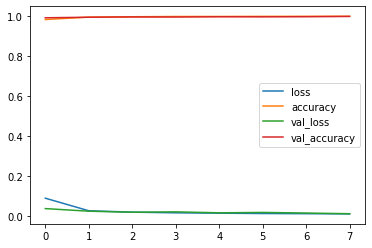

In [22]:
import pandas as pd
pd.DataFrame(history_efficient.history).plot()

In [23]:
# Create a function to import and resize an image to be used for the model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # REsize the image
  img = tf.image.resize(img, size = [img_shape,img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return tf.expand_dims(img, axis = 0)

In [24]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot_multi(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a predction with the model, and plots
  the image with the predicted class as a title.
  """

  # Imports the target images and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(tf.squeeze(tf.expand_dims(img, axis=0)),axis=0))

  # Gets the highest prediction value
  pred = tf.squeeze((np.amax(pred)))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(tf.squeeze(img))
  plt.title(("Prediction", pred_class, pred))
  plt.axis(False);

In [25]:
# Test a random image from the internet
!wget "https://i0.wp.com/saucydressings.com/wp-content/uploads/2020/06/basmati-rice.jpg?fit=1024%2C676&ssl=1"

--2022-08-10 04:51:11--  https://i0.wp.com/saucydressings.com/wp-content/uploads/2020/06/basmati-rice.jpg?fit=1024%2C676&ssl=1
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128195 (125K) [image/jpeg]
Saving to: ‘basmati-rice.jpg?fit=1024,676&ssl=1’

basmati-rice.jpg?fi 100%[===================>] 125.19K  --.-KB/s    in 0.03s   

2022-08-10 04:51:11 (3.54 MB/s) - ‘basmati-rice.jpg?fit=1024,676&ssl=1’ saved [128195/128195]



In [26]:
rice_2 = "./basmati-rice.jpg?fit=1024,676&ssl=1"

In [27]:
load_and_prep_image(rice_2)

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.07902661, 0.09079131, 0.15913866],
         [0.12832634, 0.14401262, 0.19107144],
         [0.16470589, 0.18039216, 0.22745098],
         ...,
         [0.13351108, 0.11789483, 0.1140433 ],
         [0.12937674, 0.10591736, 0.11372549],
         [0.13714986, 0.10196079, 0.11369048]],

        [[0.10273109, 0.1144958 , 0.18284313],
         [0.14418769, 0.15987396, 0.20693278],
         [0.16862746, 0.18431373, 0.23137255],
         ...,
         [0.11418101, 0.11418101, 0.12202415],
         [0.12156863, 0.11372549, 0.11764706],
         [0.12165115, 0.10596488, 0.10204331]],

        [[0.11533864, 0.12710333, 0.19545066],
         [0.15719289, 0.17287916, 0.21993798],
         [0.16915016, 0.18483643, 0.23189525],
         ...,
         [0.09778178, 0.10170335, 0.11738963],
         [0.10811584, 0.10829092, 0.11131693],
         [0.11355042, 0.10980392, 0.10223587]],

        ...,

        [[0.44310156, 0.4787461 , 

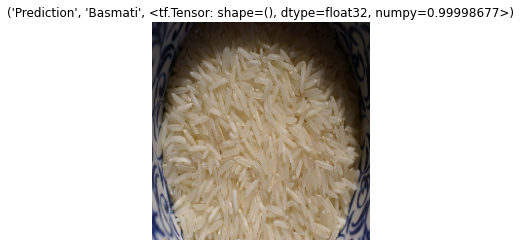

In [28]:
pred_and_plot_multi(efficient_model,rice_2)